In [13]:
!pip install ipykernel
!pip install panda 
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install nltk

In [2]:
import codecs
import re 
import copy
import collections

import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from __future__ import division
import matplotlib

%matplotlib inline

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamel_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords

In [7]:
import csv
    
train = "" 

import pandas as pd
df = pd.read_csv("DONNES/train_cap2018.csv")
df = df['fulltext']

for line in df:
       train = train + line
#print(train[:10000])

In [8]:
esw = stopwords.words('english')
esw.append('would')

In [9]:
word_pattern = re.compile("^\w+$")

In [10]:
#Tokenize les mots et compte le total
def get_text_counter(text):
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern,token) and token not in esw]
    return collections.Counter(tokens),len(tokens)


In [11]:
#Fonction qui calcule la fréquence absolue et la fréquence relative des mots les plus utilisés
def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    index = [el[0] for el in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolute Frequency", "Relative Frequency"] )
    df.index.name = "Most common words"
    return df


In [12]:
#calcule des mots les plus utilisés dans le fichier train, ça prend du temps donc ici échantillon des 10 mots les plus itlisés
je_counter, je_size = get_text_counter(train)
make_df(je_counter.most_common(10),je_size)



,Absolute Frequency,Relative Frequency
Most common words,,
like,9524.0,0.010055
good,6531.0,0.006895
work,5887.0,0.006216
job,5561.0,0.005871
people,5522.0,0.005830
years,5440.0,0.005744
go,5359.0,0.005658
hi,5334.0,0.005632
one,5272.0,0.005566


In [15]:
#enregistre les 10 000 mots les plus utilisés dans un csv
train_df = make_df(je_counter.most_common(10000000000), je_size)
train_df.to_csv("DONNES/tokenize_train.csv")

In [14]:
wh_counter, wh_size = get_text_counter(wuthering_heights)
make_df(wh_counter.most_common(10), wh_size)

NameError: name 'wuthering_heights' is not defined

In [23]:
#2eme exemple text mining
import pandas as pd
df = pd.read_csv('DONNES/train_cap2018.csv')
df.head()


,fulltext,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,...,Maas lgV0,MATTR,MSTTR,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K,level1
0,\r\r\n The Eiffel Tower The Eiffel Tower ...,16,233,1116,363,32,14.562500,4.789700,1.557940,0.068670,...,4.96,0.72,0.70,70.74,8.98,0.88,0.59,24.30,146.62,C2
1,\r\r\n The Court Green burglar arrested A...,7,180,866,268,18,25.714286,4.811111,1.488889,0.038889,...,5.07,0.74,0.76,107.12,8.57,0.89,0.64,26.14,141.98,C2
2,\r\r\n Thank you for giving us the opport...,10,180,861,269,20,18.000000,4.783333,1.494444,0.055556,...,5.99,0.77,0.78,161.93,9.62,0.92,0.72,35.15,62.96,C2
3,\r\r\n The international AI conference ca...,10,180,872,281,20,18.000000,4.844444,1.561111,0.055556,...,5.49,0.77,0.81,141.10,9.09,0.90,0.68,30.11,70.99,C2
4,\r\r\n I believe that the creative writin...,11,187,849,283,29,17.000000,4.540107,1.513369,0.058824,...,4.61,0.68,0.64,70.69,7.97,0.87,0.58,22.02,124.11,C2


In [28]:
from io import StringIO

col = ['fulltext', 'level1']
df = df[col]
df = df[pd.notnull(df['fulltext'])]

df.columns = ['fulltext', 'level1']

df['category_id'] = df['level1'].factorize()[0]
category_id_df = df[['level1', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'level1']].values)
df.head()

,fulltext,level1,category_id
0,\r\r\n The Eiffel Tower The Eiffel Tower ...,C2,0
1,\r\r\n The Court Green burglar arrested A...,C2,0
2,\r\r\n Thank you for giving us the opport...,C2,0
3,\r\r\n The international AI conference ca...,C2,0
4,\r\r\n I believe that the creative writin...,C2,0


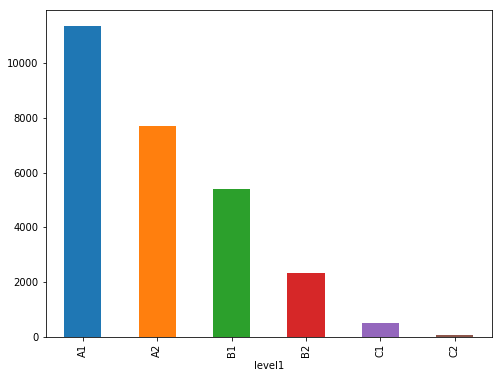

In [35]:
#On a beaucoup plus de niveau A1 que de niveau C2, 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('level1').level1.count().plot.bar(ylim=0)
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#calcule un vecteur tf-idf pour chaque texte en anglais
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.fulltext).toarray()
labels = df.category_id
features.shape

#Soit pour les 27310 récits en anglais ils sont representés par 28555 caractéristiques

(27310, 28555)

In [40]:
#ATTENTION TEMPS D'EXECUTION TRES LONG
#On cherche ici une correlation entre les termes et le niveau d'anglais

from sklearn.feature_selection import chi2
import numpy as np


N = 2
for level1, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(level1))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'A1':
  . Most correlated unigrams:
. live
. busy
  . Most correlated bigrams:
. busy good
. good evening
# 'A2':
  . Most correlated unigrams:
. feed
. dog
  . Most correlated bigrams:
. talk phone
. feed dog
# 'B1':
  . Most correlated unigrams:
. bowling
. bottles
  . Most correlated bigrams:
. shots turn
. plastic bottles
# 'B2':
  . Most correlated unigrams:
. discrimination
. apply
  . Most correlated bigrams:
. absolutely amazing
. amazing job
# 'C1':
  . Most correlated unigrams:
. vote
. council
  . Most correlated bigrams:
. green business
. student council
# 'C2':
  . Most correlated unigrams:
. pettigrew
. robot
  . Most correlated bigrams:
. french revolution
. emotional intelligence


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['fulltext'], df['level1'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [102]:
#Testons quelques predictions :

print(clf.predict(count_vect.transform(["The Court Green burglar arrested A 23 years old man was arrested at 6am in connection with the series of burglaries in and around Court Green that had been taking place over the past 15 months. The suspect's name has not been released yet. The police had made every effort to catch the burglar, such as increasing the police patrols in the area, setting up undercover surveillance, having a publicity campaign published in this local paper, and promising a $300 reward for information. John White, police lieutenant, confirmed that people felt concerned by these efforts and were willing to help the police. Thanks to a local resident who saw somebody acting suspiciously in the neighbourhood, the police patrolling nearby managed to give chase to the suspect and eventually cornered him in Hamilton Road at 6am. The man is currently being held in custody for police questioning and is bound to be charged for the crimes by the end of tomorrow. James Denver, a Court Green inhabitant, reported he felt greatly relieved to know that the burglar had been arrested. "])))

['A2']


In [ ]:
#ATTENTION EXTREMEMENT LONG A EXECUTER
#REPRESENTATION DE CHAQUE MODEL AVEC LEURS PRECISIONS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
cv_df = pd.DataFrame(index=range(len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

KeyboardInterrupt: 